In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow --upgrade pandas_datareader

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

In [19]:
# Read the MSFT stock data from CSV (replace 'MSFT.csv' with your actual file path)
msft_data = pd.read_csv('MSFT-1.csv', parse_dates=['Date'], index_col='Date')  # Assuming 'Date' column exists
close_prices = msft_data['Close'].values.reshape(-1, 1)

# Extract closing prices and calculate returns
closing_prices = msft_data['Close']   # Replace 'Close' if your column is named differently
returns = closing_prices.pct_change()
returns = returns.dropna()  # Remove the first row (NaN due to percentage change calculation)

# Simulate portfolio performance with 100% allocation to MSFT
weights = np.array([1.0])  # Single weight for MSFT
time_period = len(returns)  # Number of trading days in your data

mean_return = returns.mean()
cov_matrix = returns.var()  # Variance for a single asset

portfolio_return = np.sum(mean_return * weights) * time_period
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(time_period)

print("Portfolio Return:", portfolio_return)
print("Portfolio Standard Deviation:", portfolio_std_dev)

print("Mean Return: ", mean_return)

Portfolio Return: 10.125385555447599
Portfolio Standard Deviation: 2.0327133123346233
Mean Return:  0.0011148849983976656


In [20]:

# Monte Carlo simulation for single-asset portfolio
mc_sims = 8000
T = 100
initialPortfolio = 1

meanM = np.full(shape=(T, 1), fill_value=mean_return)
stock_simulations = np.zeros((T, mc_sims))

for m in range(mc_sims):
    # Generate random returns (note: we only need one column now)
    Z = np.random.normal(size=(T, 1))
    std_dev = np.sqrt(cov_matrix)  # Standard deviation is the square root of variance
    dailyReturns = meanM + Z * std_dev  # Directly scale random values by std_dev

    # Calculate cumulative portfolio values (matrix multiplication with a single column is simplified)
    stock_simulations[:, m] = initialPortfolio * np.cumprod(1 + dailyReturns[:, 0], axis=0)

# Analysis (examples)
mean_portfolios = stock_simulations.mean(axis=1)
percentile_5 = np.percentile(stock_simulations, 5, axis=1)
percentile_95 = np.percentile(stock_simulations, 95, axis=1)

In [21]:
print(stock_simulations)
print("Mean: ", mean_portfolios)

[[0.98654228 1.02643344 1.03260652 ... 1.01977106 0.98358629 1.00627246]
 [0.9843883  1.00378399 1.07614388 ... 0.99238909 0.97385351 1.02084557]
 [0.98553656 0.98609051 1.10049765 ... 0.99145321 0.95526734 1.03724005]
 ...
 [0.8038617  1.30271758 1.23723889 ... 1.2026282  0.89693237 1.25692555]
 [0.83980432 1.32617058 1.25377922 ... 1.22620964 0.8989795  1.26155496]
 [0.85469869 1.33563036 1.275894   ... 1.1872058  0.90299935 1.24879881]]
Mean:  [1.00094701 1.00241549 1.00312724 1.00382696 1.00479124 1.00605854
 1.00741199 1.00865906 1.00978483 1.01132805 1.01247745 1.01339899
 1.0148193  1.01583703 1.01727763 1.01796182 1.01907309 1.02011418
 1.02132925 1.02220337 1.02314263 1.0244612  1.02567104 1.02641274
 1.02739273 1.02911624 1.03033781 1.03186007 1.03309824 1.03382943
 1.03499559 1.03614432 1.03730992 1.03886168 1.0399595  1.04110791
 1.04236139 1.04342266 1.04446977 1.04576197 1.04710486 1.04820567
 1.04895254 1.05025312 1.05021414 1.05112971 1.0521235  1.05323756
 1.05428387 1

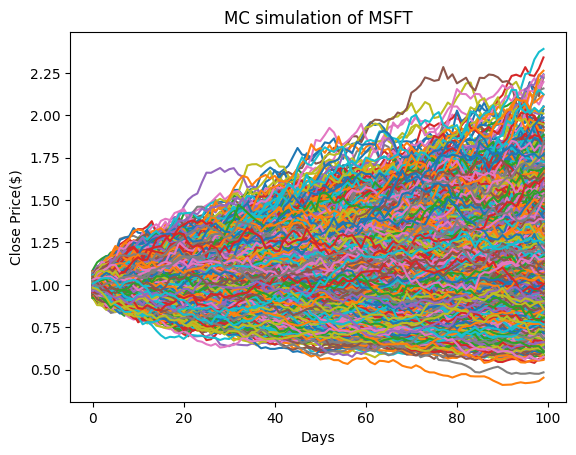

In [22]:
#plt.figure(figsize=(14, 5))
plt.plot(stock_simulations)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('MC simulation of MSFT')
plt.show()

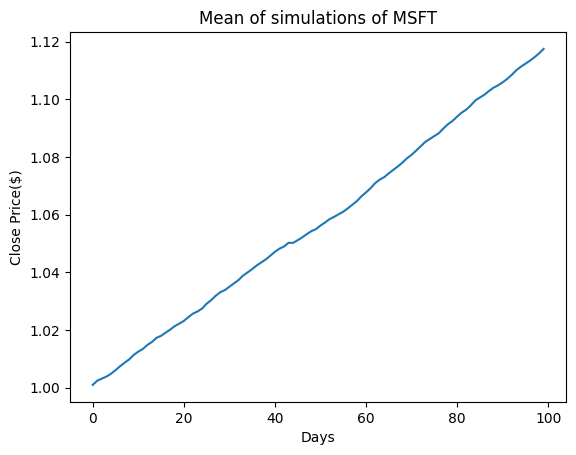

In [23]:
#plt.figure(figsize=(14, 5))
plt.plot(mean_portfolios)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('Mean of simulations of MSFT')
plt.show()

NameError: name 'dates' is not defined